### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Apr 2nd at 11.59pm CT
---

## Only one problem this week

This is a regression problem. Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [ ]:
# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(___, ___, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(___.flatten(), ___.flatten(), ___, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [ ]:
# To turn off interactive plotting
%matplotlib inline

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


5. Perform Nadaraya-Watson regression on the data, using a Gaussian kernel with a bandwidth of $0.2$. Visualize interactively as before. How does this look compared to previous models?


6. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*


7. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


8. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out a $20\%$ cross-validation set from the training set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

### Solution

In [2]:
import numpy as np
from matplotlib import pyplot as plt

### (1)

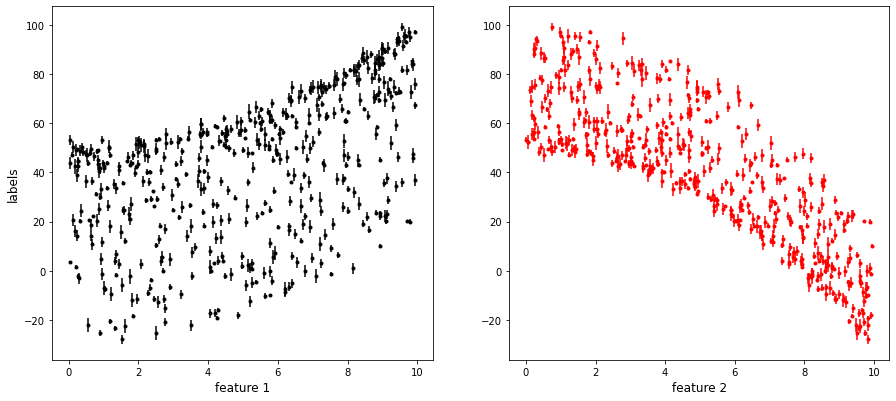

In [28]:
# Read in hw7_data_1.npy. The dataset should consist of  500  samples. The first two columns are the two data 
# features, X. The third column is the target labels, y, and the final column are the heteroscedastic uncertainties 
# on the labels, yerr. Make a 2-panel scatter plot of the labels versus each feature.

data = np.load("../../homeworks/hw_data/hw7_data_1.npy")
X, y, yerr = data[:,[0,1]], data[:,2], data[:,3]

fig,ax = plt.subplots(1, 2, figsize=(15, 6.5))
ax[0].errorbar(X[:,0], y, yerr=yerr,fmt='.k')
ax[0].set_xlabel('feature 1',fontsize=12); ax[0].set_ylabel('labels',fontsize=12)
ax[1].errorbar(X[:,1], y, yerr=yerr,fmt='.r')
ax[1].set_xlabel('feature 2',fontsize=12); ax[0].set_ylabel('labels',fontsize=12)
plt.show()
# np.shape(data)

### (2)

In [76]:
# Use multivariate linear regression on this data with its uncertainties (astroML rather than plain sklearn is the 
# better option here). Print the best-fit intercept and slopes for the features. Make a prediction Xgrid over  50  
# values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the  
# 2 -panel plot from (1); does this look like a good description of the data?

from astroML.linear_model import LinearRegression

 # y = 0 + 1*x1 + 1*x2 ?????

model = LinearRegression()
model.fit(X, y, yerr)

print(model.coef_)

[57.10102323  4.94873016 -8.30023407]


In [83]:
np.shape(model.predict(X))
np.shape(X)
model.predict(X)

(500, 2)

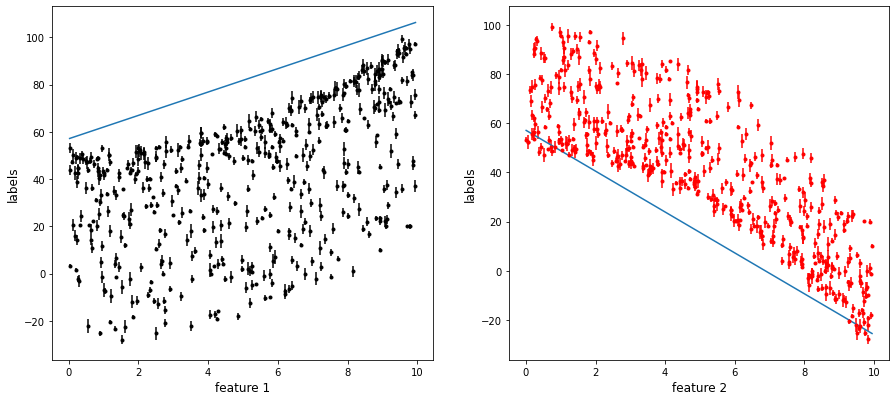

In [145]:
Xgrid1 = np.linspace(np.amin(X[:,0]),np.amax(X[:,0]),50)
Xgrid2 = np.linspace(np.amin(X[:,1]),np.amax(X[:,1]),50)

# samp = np.hstack([Xgrid1.reshape(50,1),Xgrid2.reshape(50,1)])
# y_pred = model.predict(samp)

y_pred1 = model.coef_[1]*Xgrid1 + model.coef_[0]
y_pred2 = model.coef_[2]*Xgrid2 + model.coef_[0]

fig,ax = plt.subplots(1, 2, figsize=(15, 6.5))

ax[0].errorbar(X[:,0], y, yerr=yerr,fmt='.k')
ax[0].plot(Xgrid1, y_pred1)
ax[0].set_xlabel('feature 1',fontsize=12); ax[0].set_ylabel('labels',fontsize=12)

ax[1].errorbar(X[:,1], y, yerr=yerr,fmt='.r')
ax[1].plot(Xgrid2, y_pred2)
ax[1].set_xlabel('feature 2',fontsize=12); ax[1].set_ylabel('labels',fontsize=12)

plt.show()

### (3)

/var/folders/8_/cx8t3z6n4c9ftpn96__x7z5c0000gq/T/ipykernel_43283/1184370598.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  Xgrid = np.vstack(map(np.ravel, np.meshgrid(Xgrid1, Xgrid2))).T


<IPython.core.display.Javascript object>


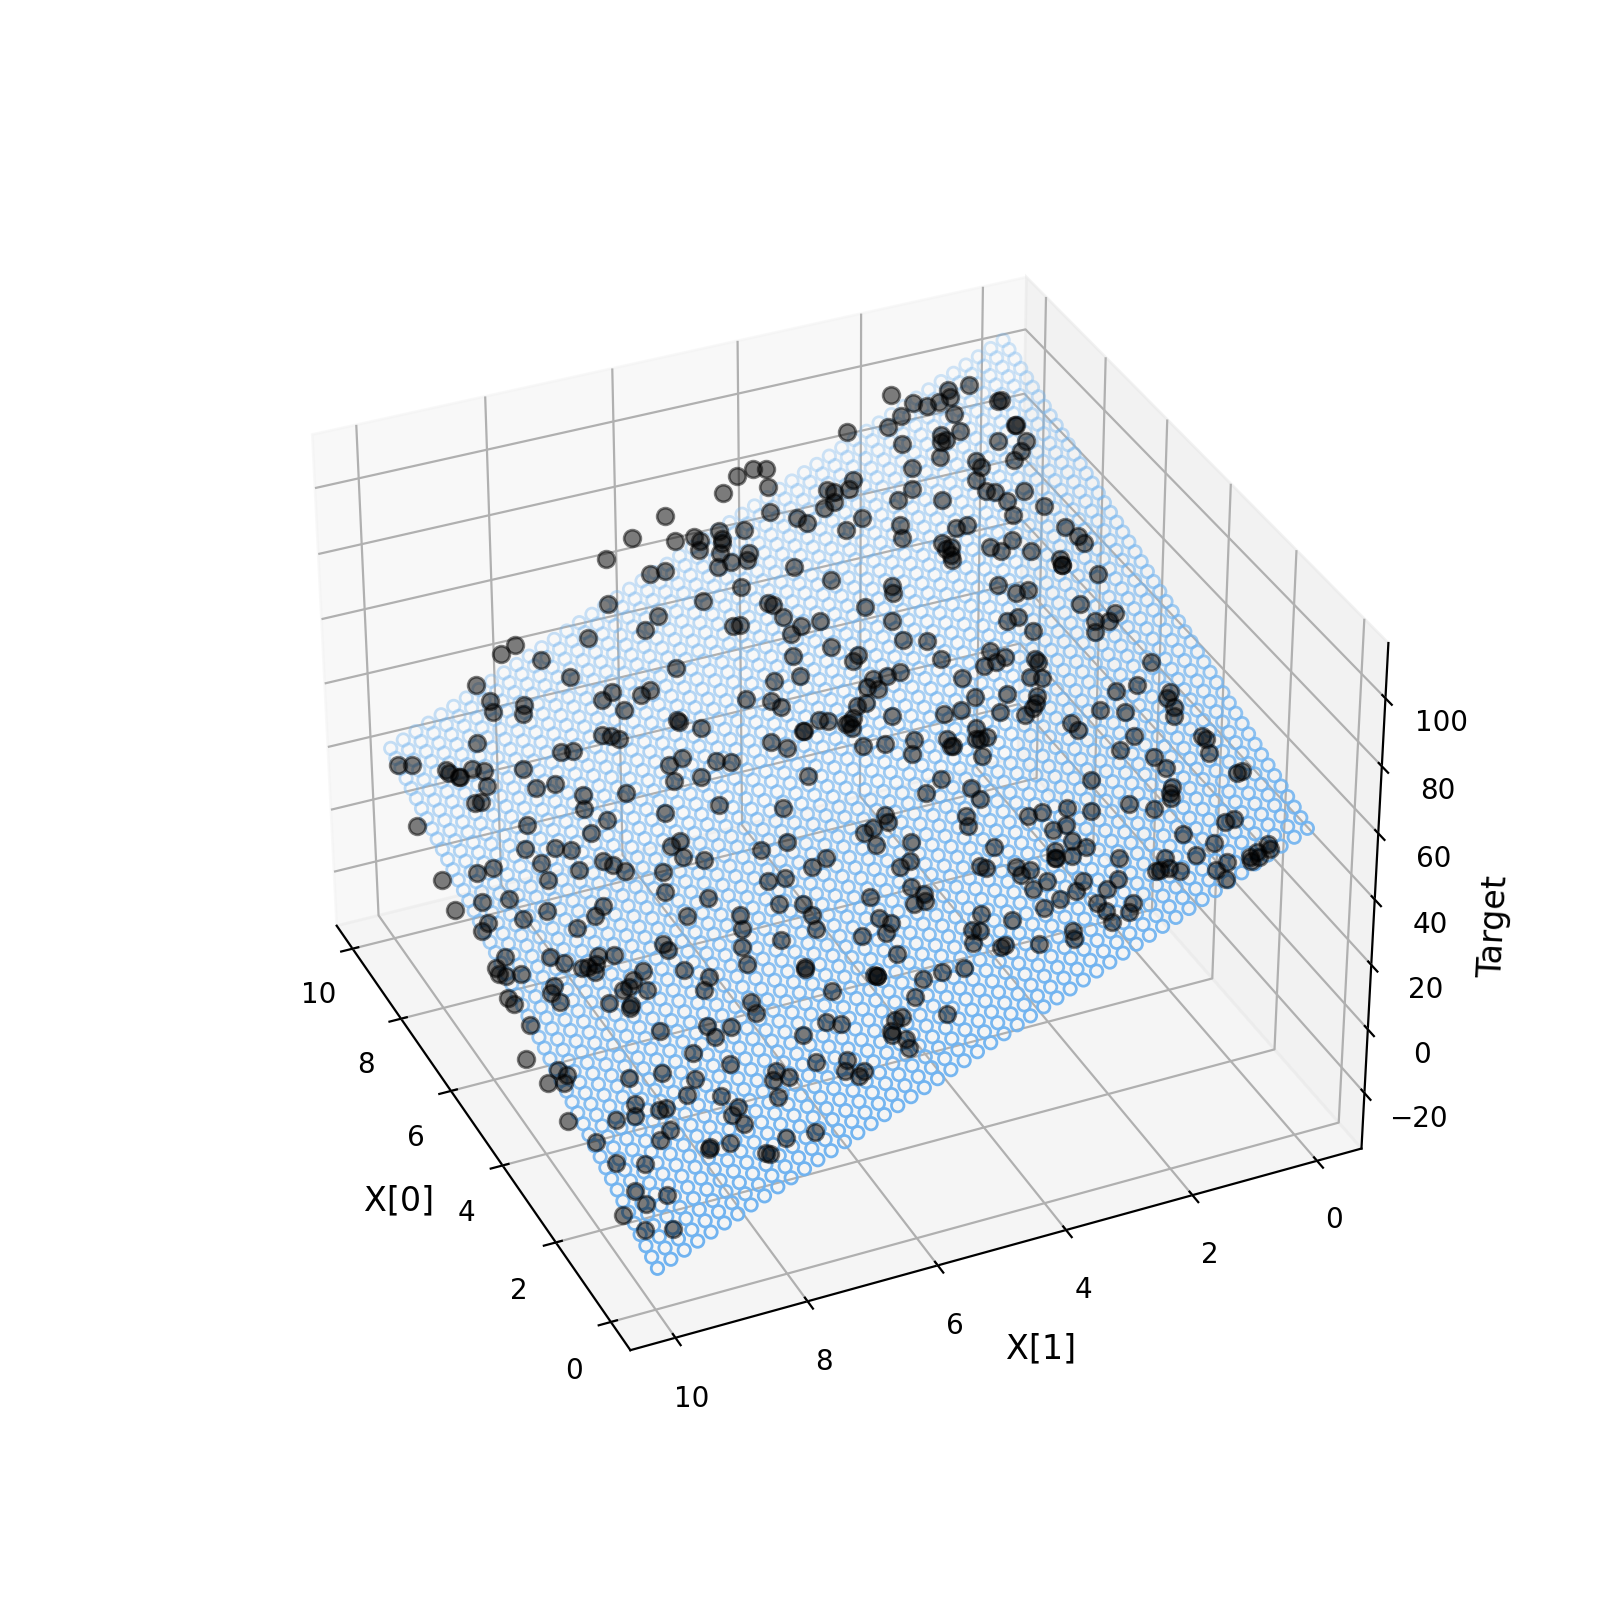

In [167]:
# Make a new two-dimensional prediction meshgrid Xgrid over the  2 -D feature space, use your best-fit model to 
# predict the labels, and make a  3 -D interactive plot showing the data and your best-fit over the entire space. 
# You may find the following code useful.

Xgrid = np.vstack(map(np.ravel, np.meshgrid(Xgrid1, Xgrid2))).T
y_pred = model.predict(Xgrid)

# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0], Xgrid[:,1], y_pred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [170]:
# To turn off interactive plotting
%matplotlib inline

In [ ]:
# fig = plt.figure(figsize=(15,10))
# ax = plt.axes(projection='3d')

# ax.scatter(X[:,0], X[:,1], y, c='r', s=30, alpha=0.5)
# ax.plot(Xgrid[:,0], Xgrid[:,1], y_pred, c='k')

# ax.set_xlabel('feature 1',fontsize=13)
# ax.set_ylabel('feature 2',fontsize=13)
# ax.set_zlabel('labels',fontsize=13)

# # ax.view_init(-15, 180)
# ax.view_init(-15, 190)
# # ax.view_init(130, 100)

### (4)

In [175]:
# Sticking with a linear model, now attempt a GridSearchCV procedure on the data to find the best Ridge regression 
# hyper-parameters. Use the following param_grid:
# ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
# What are the best_params_ and the best_score_ from this? Fit the data with the best options, and visualize 
# interactively. Try RidgeCV also; what cross-validated alpha_ does it return, and does this agree with GridSeachCV? 
# (Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}

grid = GridSearchCV(Ridge(), ridge_params)
grid.fit(X, y, sample_weight=1/yerr**2)
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 1.0, 'solver': 'lsqr'}
0.929182742615996


<IPython.core.display.Javascript object>


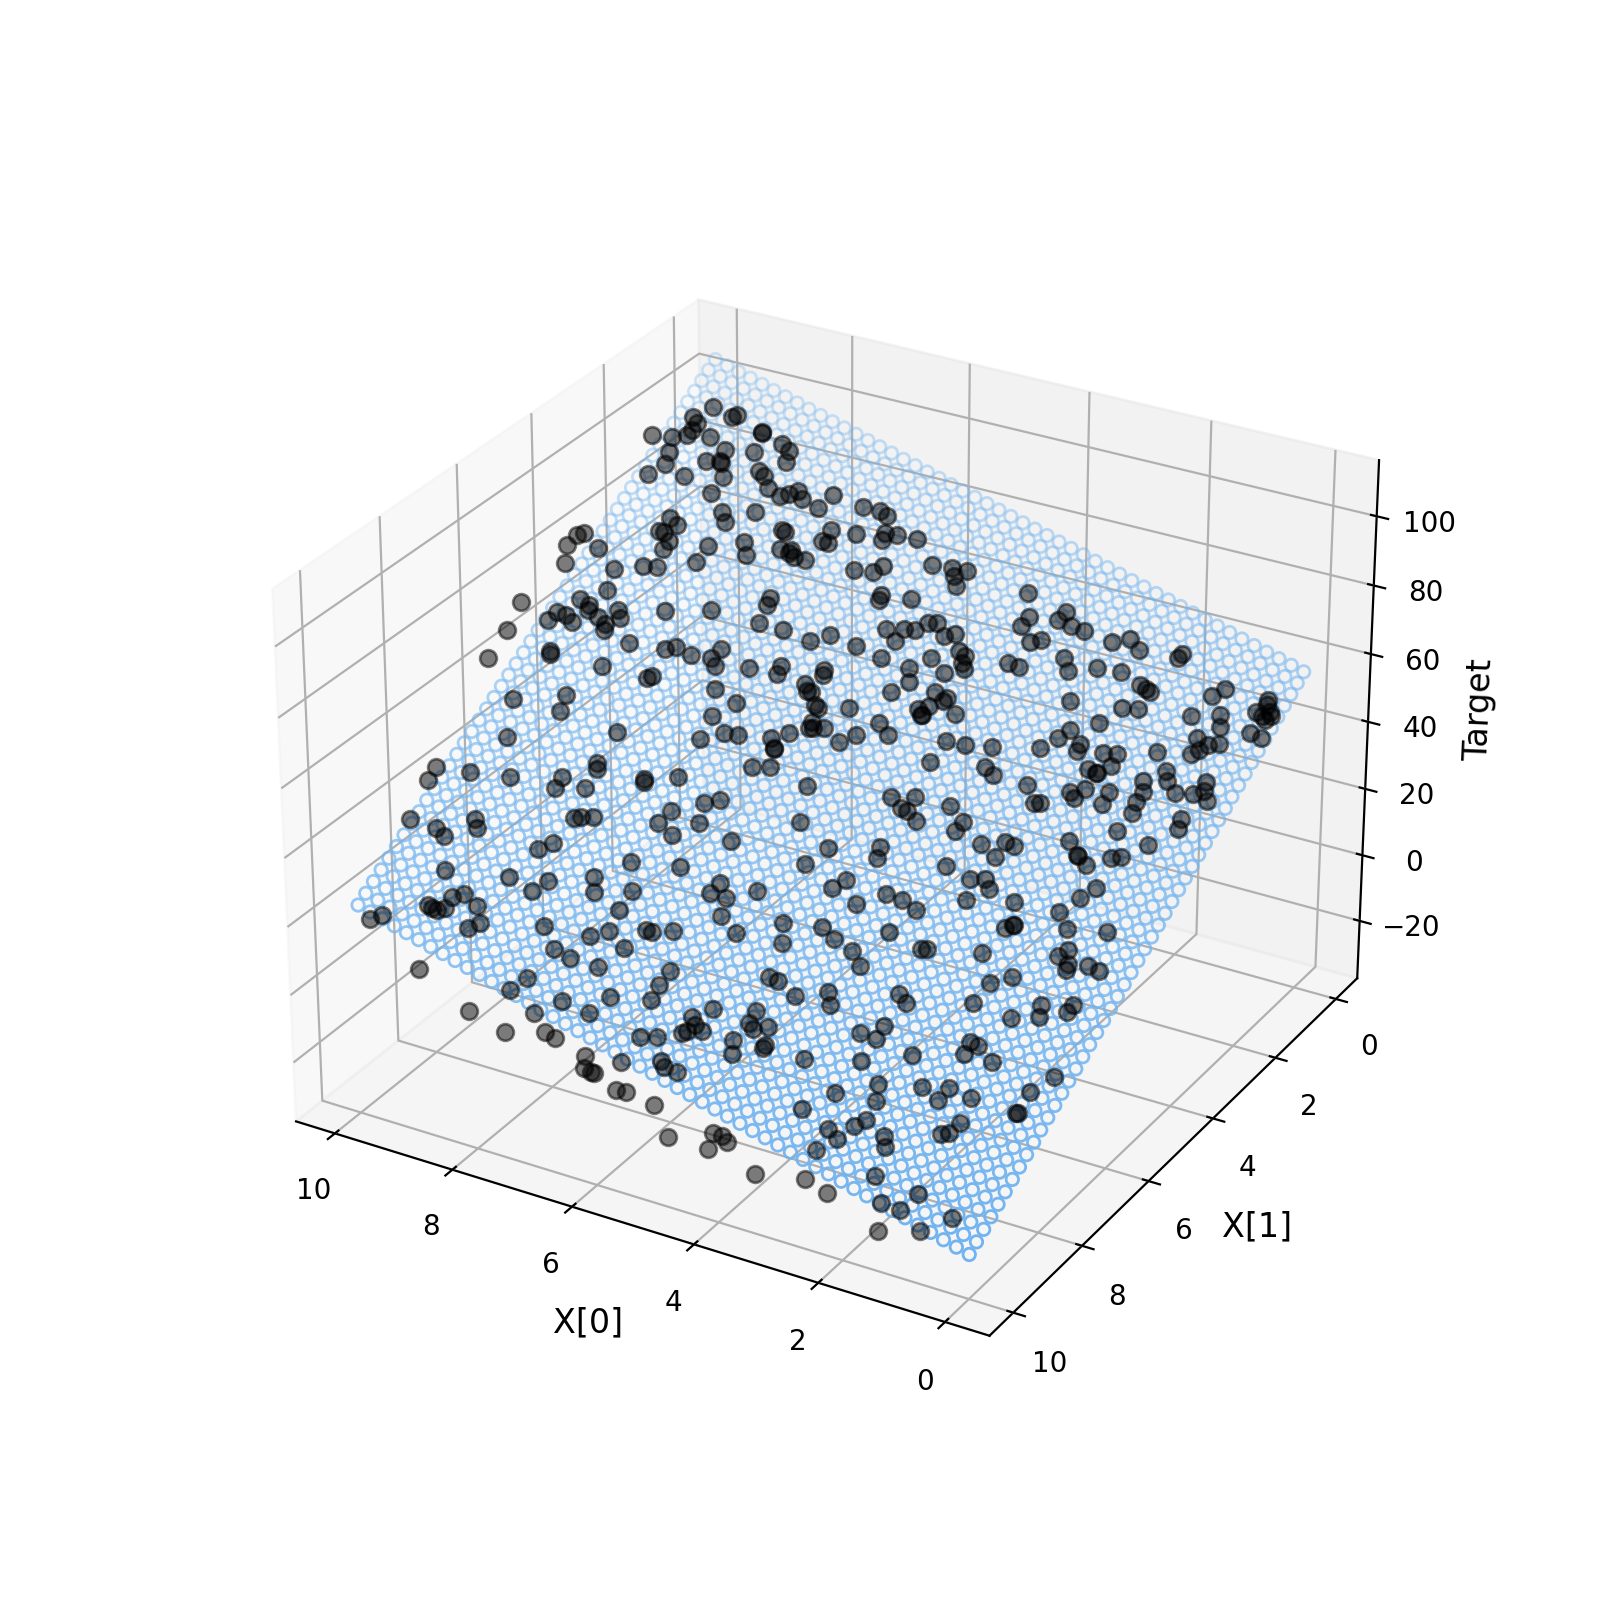

In [178]:
ridge_model = Ridge(alpha=1) # alpha here is lambda in the book
ridge_model.fit(X,y,sample_weight=1/yerr**2)
ridge_y_pred = ridge_model.predict(Xgrid)

%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0], Xgrid[:,1], ridge_y_pred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)


In [179]:
# To turn off interactive plotting
%matplotlib inline

In [181]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV()
ridge_cv.fit(X,y,sample_weight=1/yerr**2)

print(ridge_cv.alpha_)

1.0


### (5)

<IPython.core.display.Javascript object>


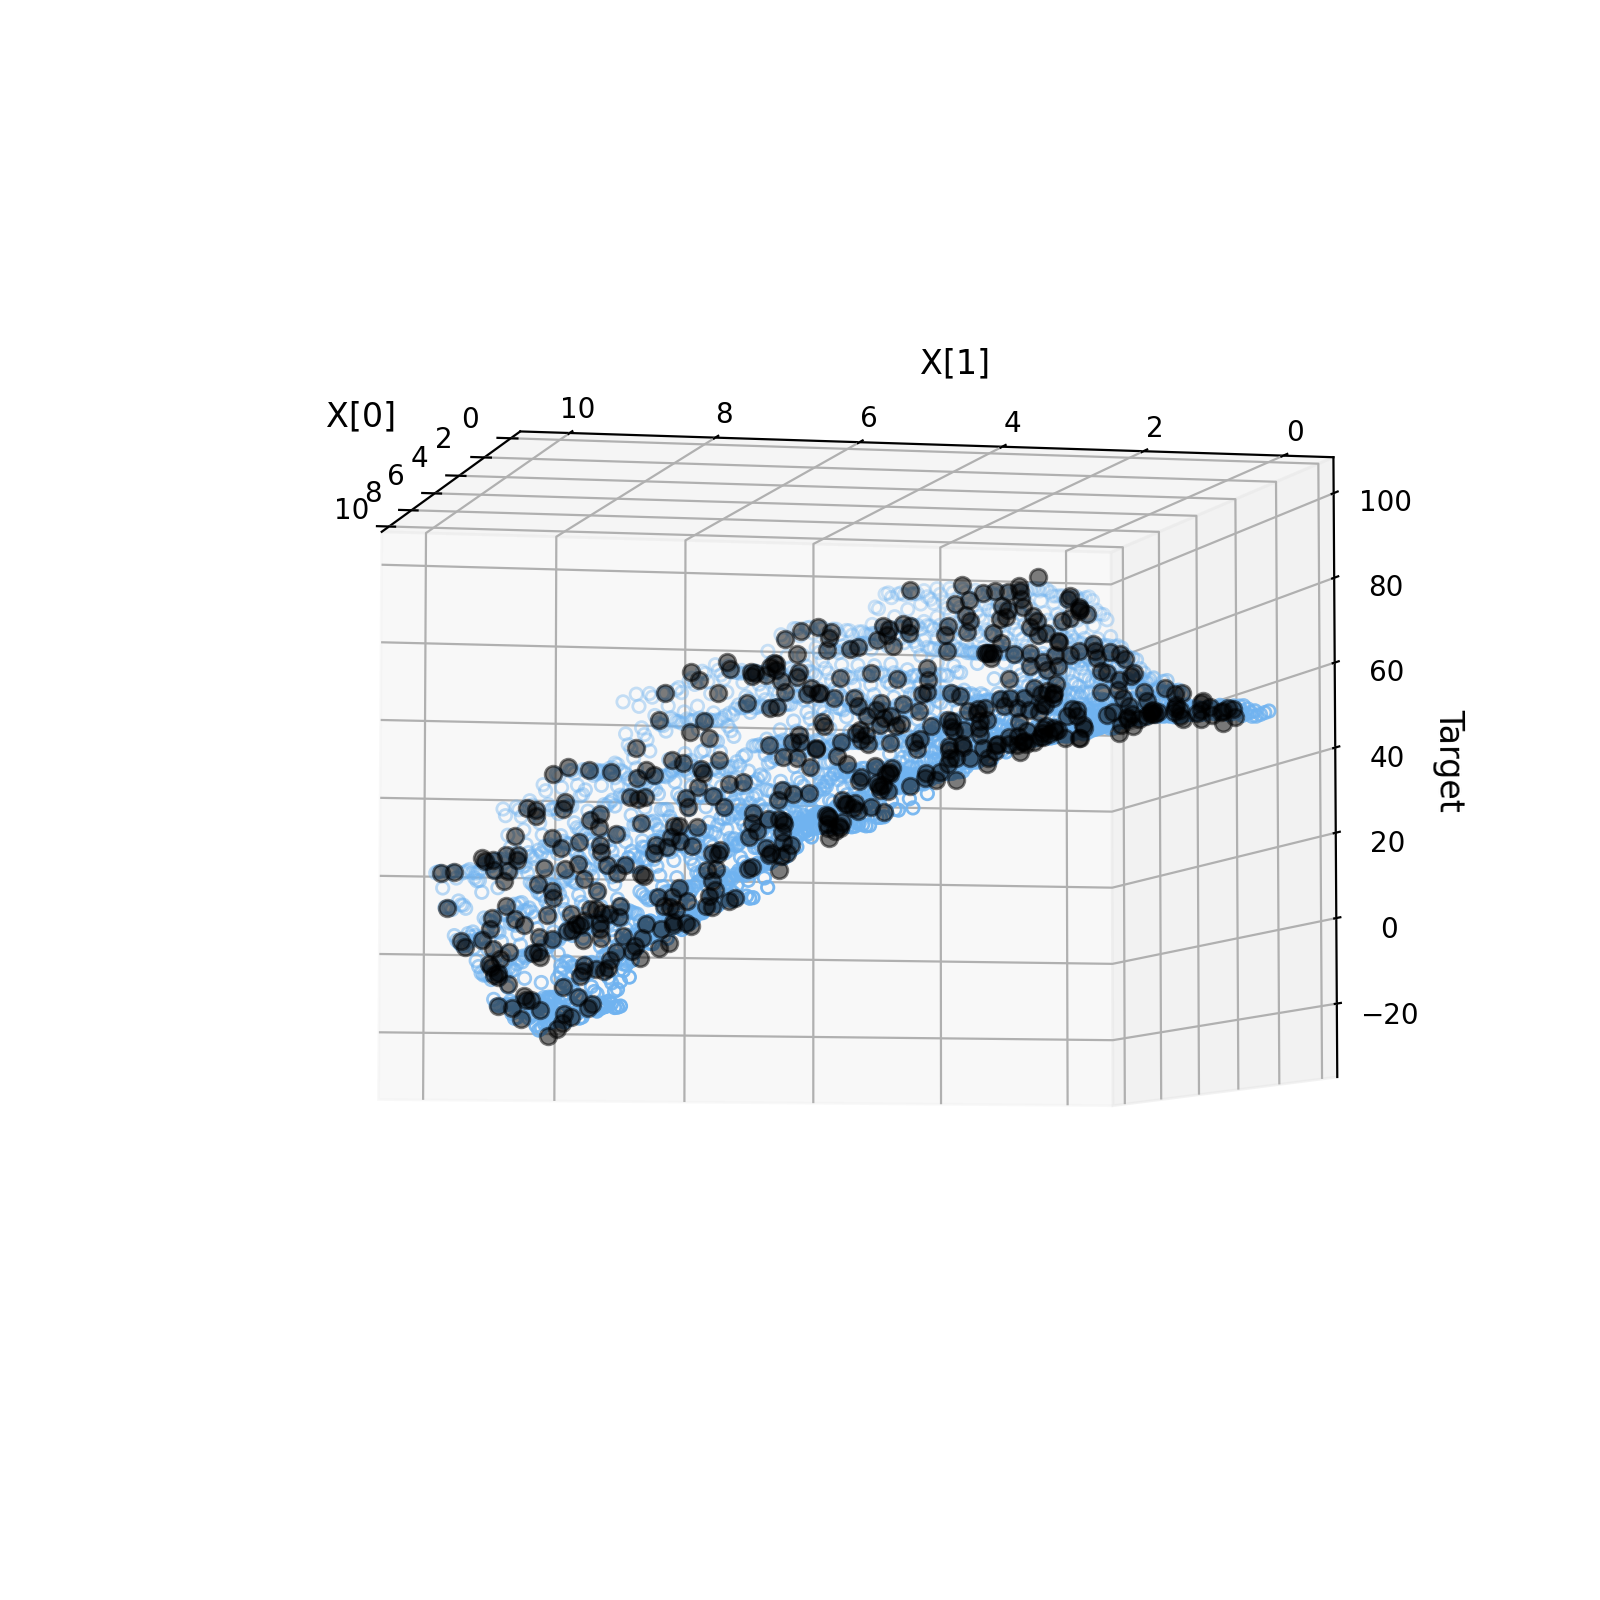

In [183]:
# Perform Nadaraya-Watson regression on the data, using a Gaussian kernel with a bandwidth of  0.2 . 
# Visualize interactively as before. How does this look compared to previous models?

from astroML.linear_model import NadarayaWatson

nw_model = NadarayaWatson(kernel='gaussian', h=0.2)
nw_model.fit(X,y,yerr)

nw_y_pred = nw_model.predict(Xgrid)


%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0], Xgrid[:,1], nw_y_pred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [184]:
# To turn off interactive plotting
%matplotlib inline

### (6)

In [189]:
# Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with 
# and with and without uncertainties accounted for. (Hint: GPR in sklearn takes an alpha parameter equal 
# to (yerr/y)**2.)

from sklearn.gaussian_process import GaussianProcessRegressor

# without accounting for uncertainty 
gp = GaussianProcessRegressor()
gp.fit(X,y)
gp_y_pred = gp.predict(Xgrid)

# ccounting for uncertainty 
gp_witherr = GaussianProcessRegressor(alpha=(yerr/y)**2)
gp_witherr.fit(X,y)
gp_witherr_y_pred = gp_witherr.predict(Xgrid)

<IPython.core.display.Javascript object>


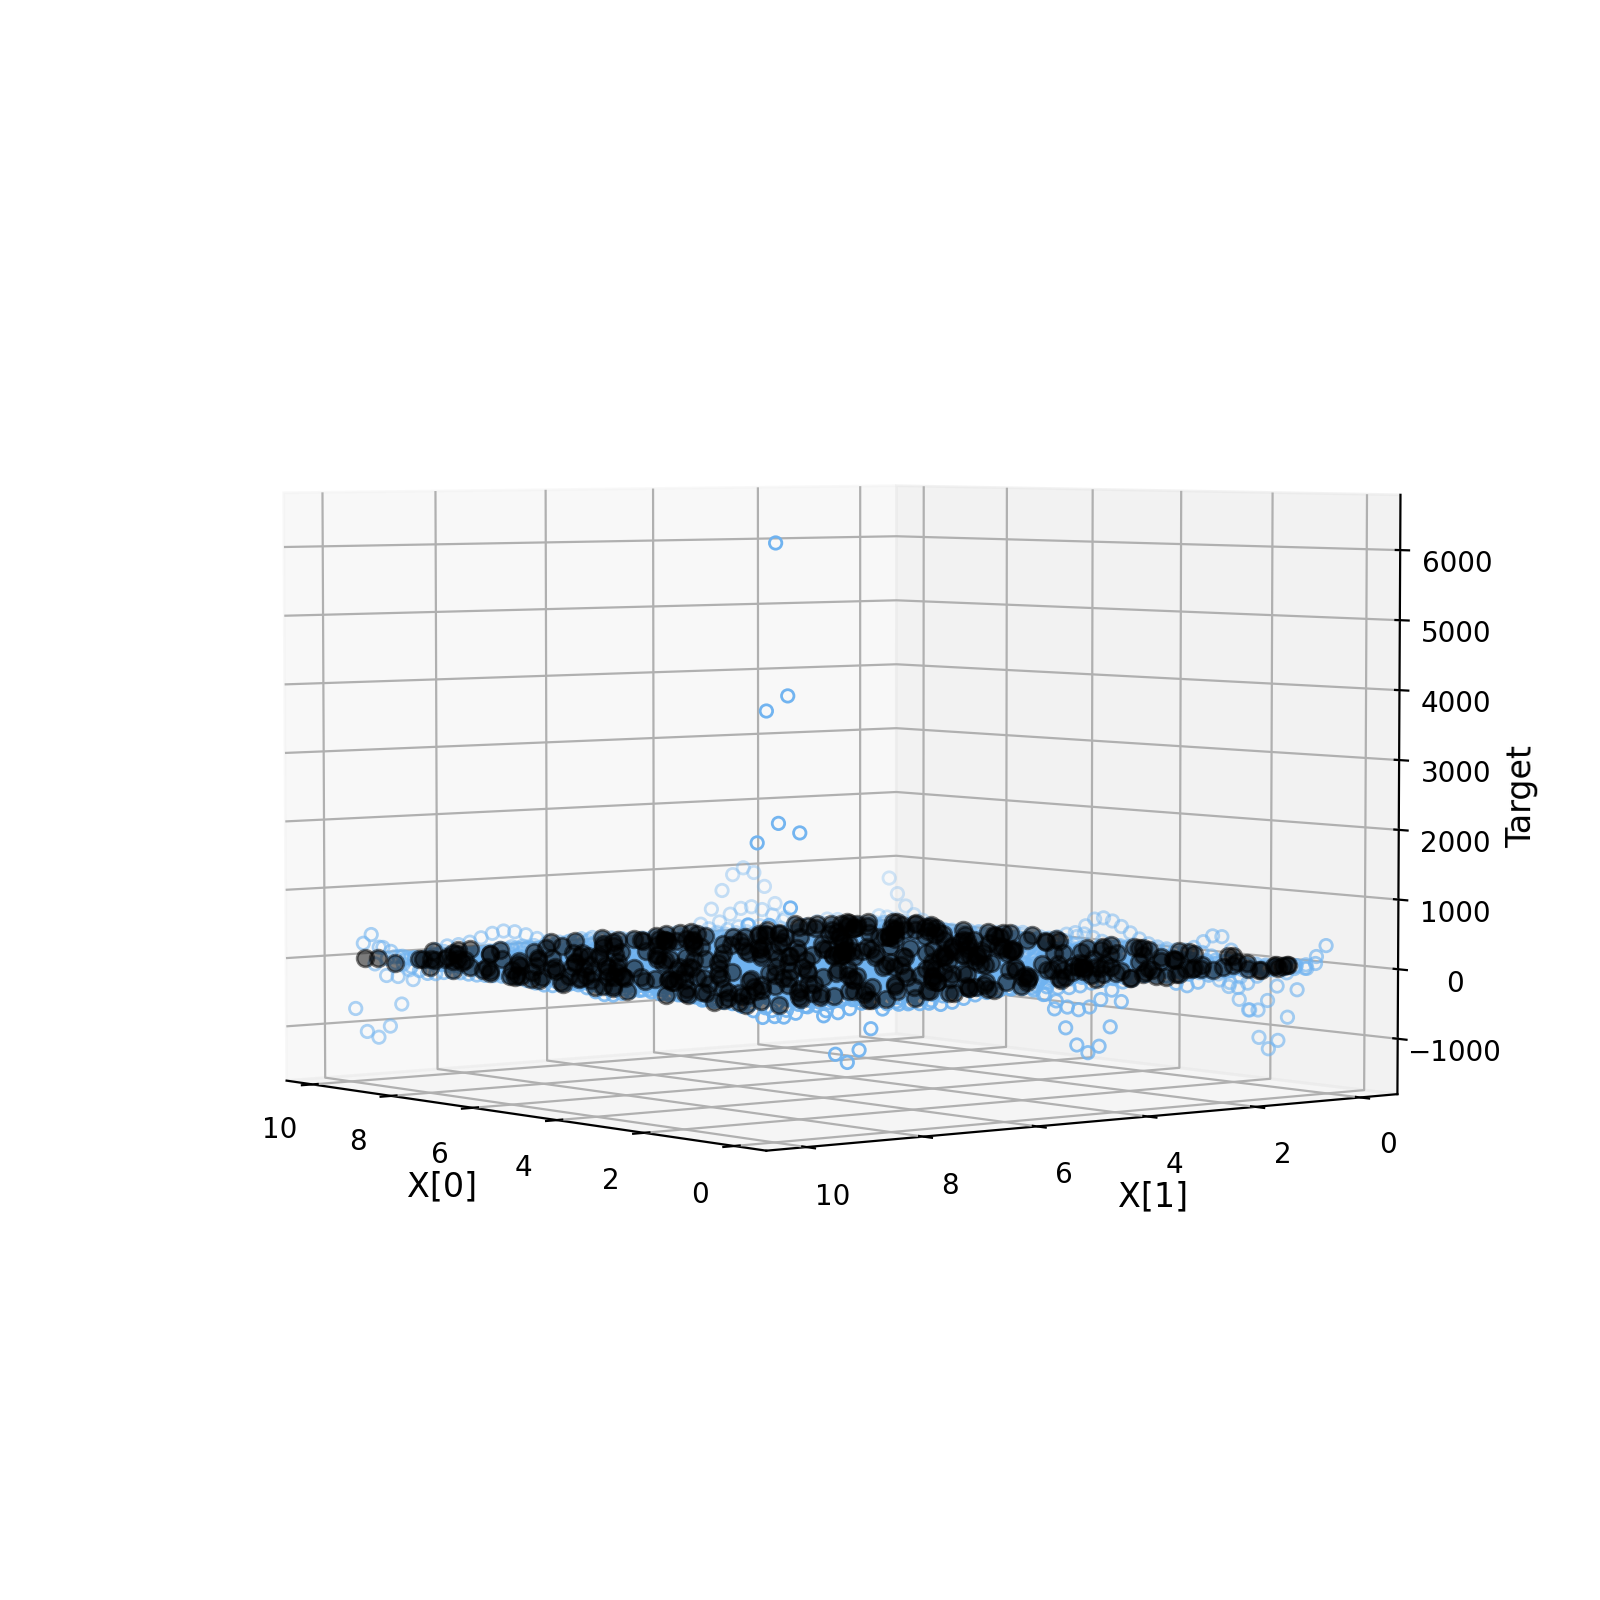

In [190]:
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0], Xgrid[:,1], gp_y_pred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [191]:
# To turn off interactive plotting
%matplotlib inline

<IPython.core.display.Javascript object>


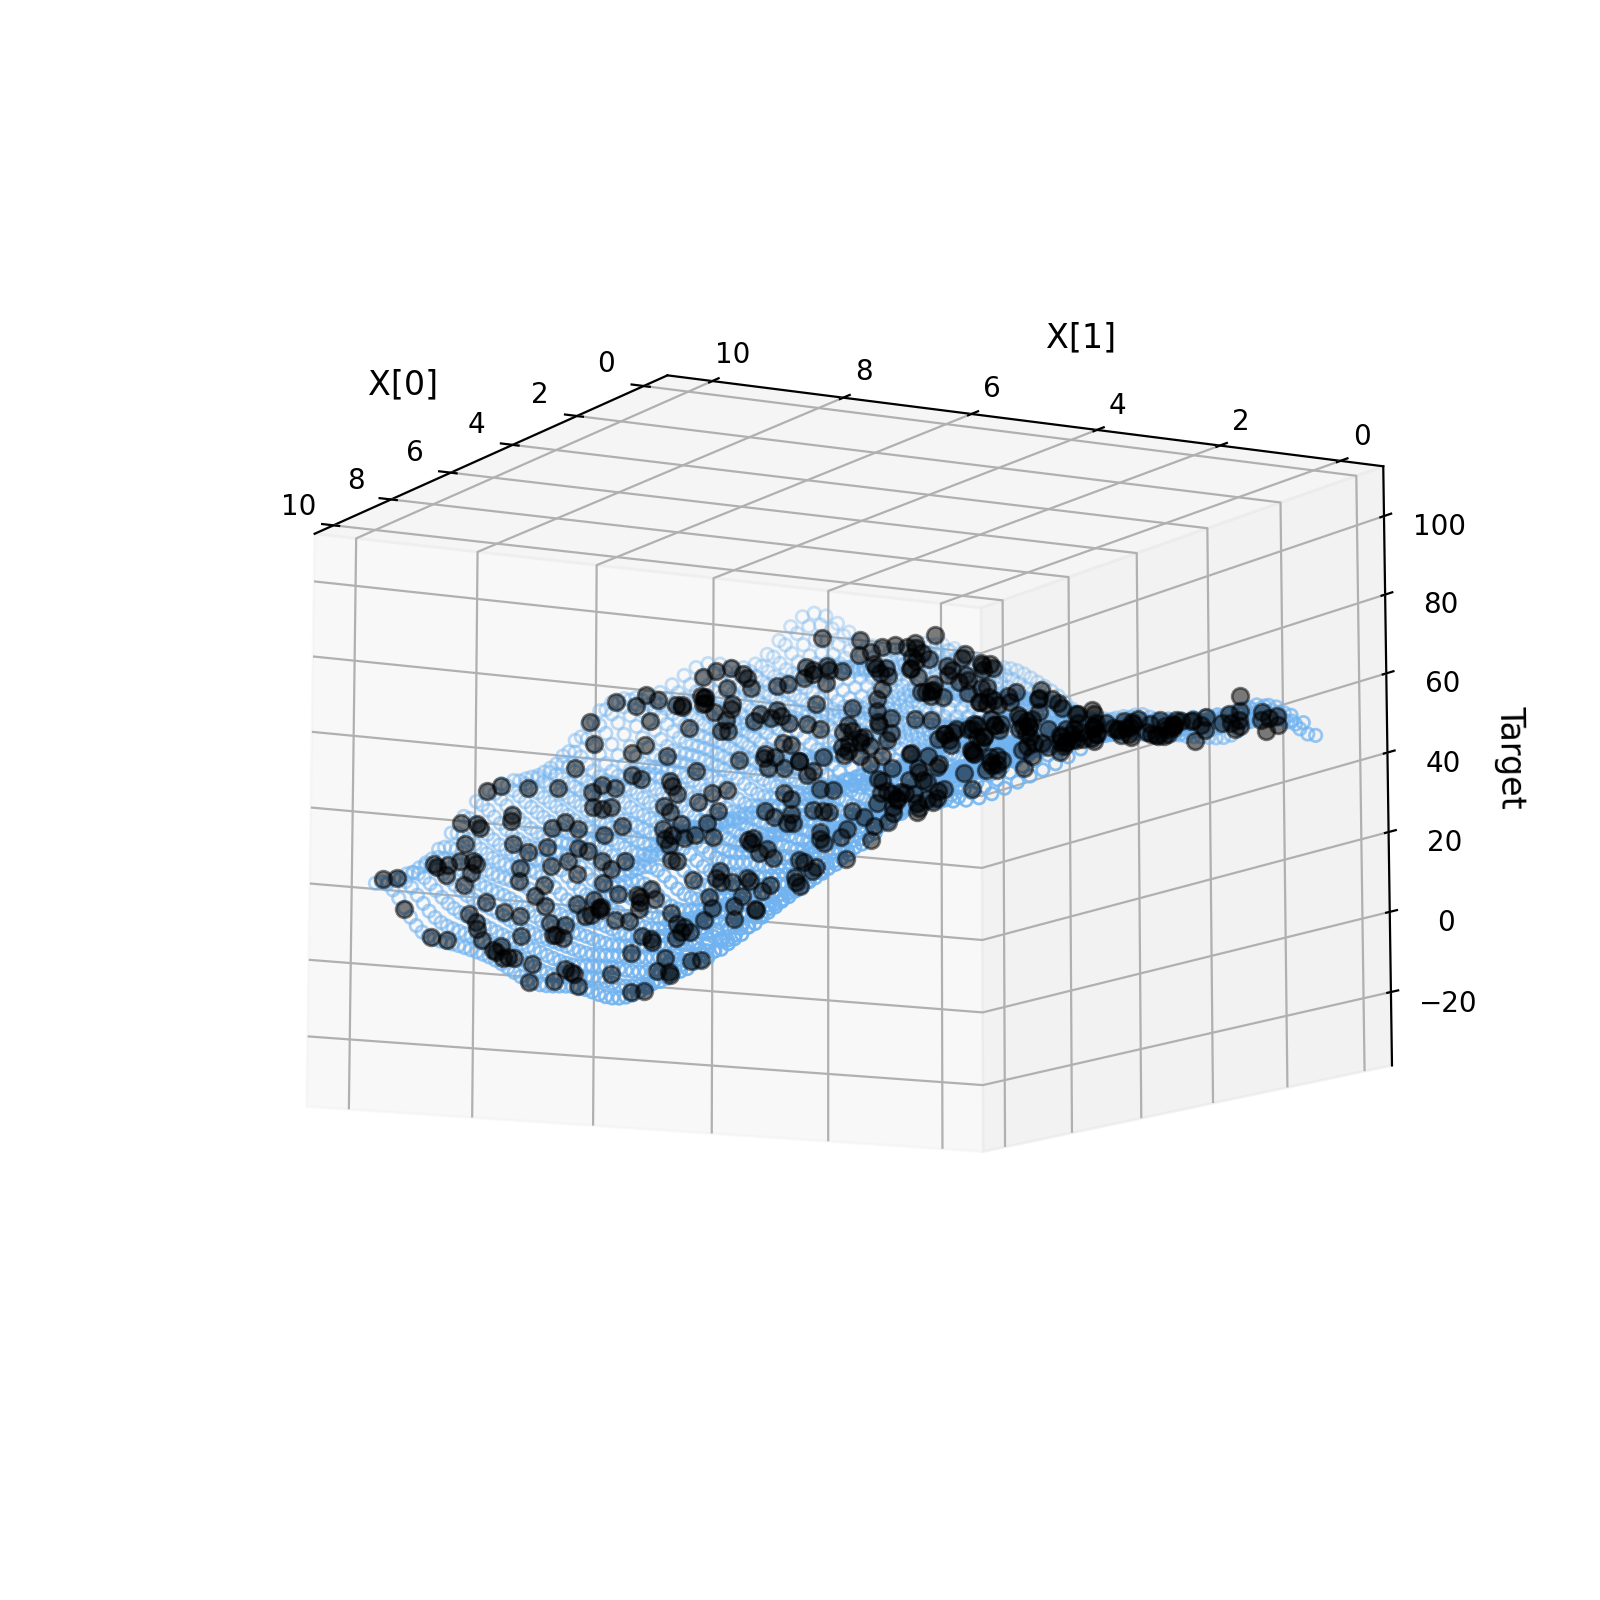

In [192]:
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0], Xgrid[:,1], gp_witherr_y_pred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [193]:
# To turn off interactive plotting
%matplotlib inline

### (7)

In [197]:
# Let's look finally at polynomial fitting. Fit a  4 th degree polynomial to the data. 
# Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before.
# How does this look compared to the linear model and GPR models?

from astroML.linear_model import PolynomialRegression

degree = 4
poly = PolynomialRegression(degree)
poly.fit(X,y,yerr)
print(poly.coef_)
      
poly_y_pred = poly.predict(Xgrid)

[ 4.99887582e+01  5.54313398e-01 -2.07866484e-01  2.86536907e-01
  2.93842380e-03 -7.82230112e-01  2.47603263e-02  2.45748271e-02
 -2.22233559e-02  9.68417971e-03 -9.95958746e-04 -1.12284370e-03
 -1.14462222e-03  2.10142159e-03 -1.08539159e-03]


<IPython.core.display.Javascript object>


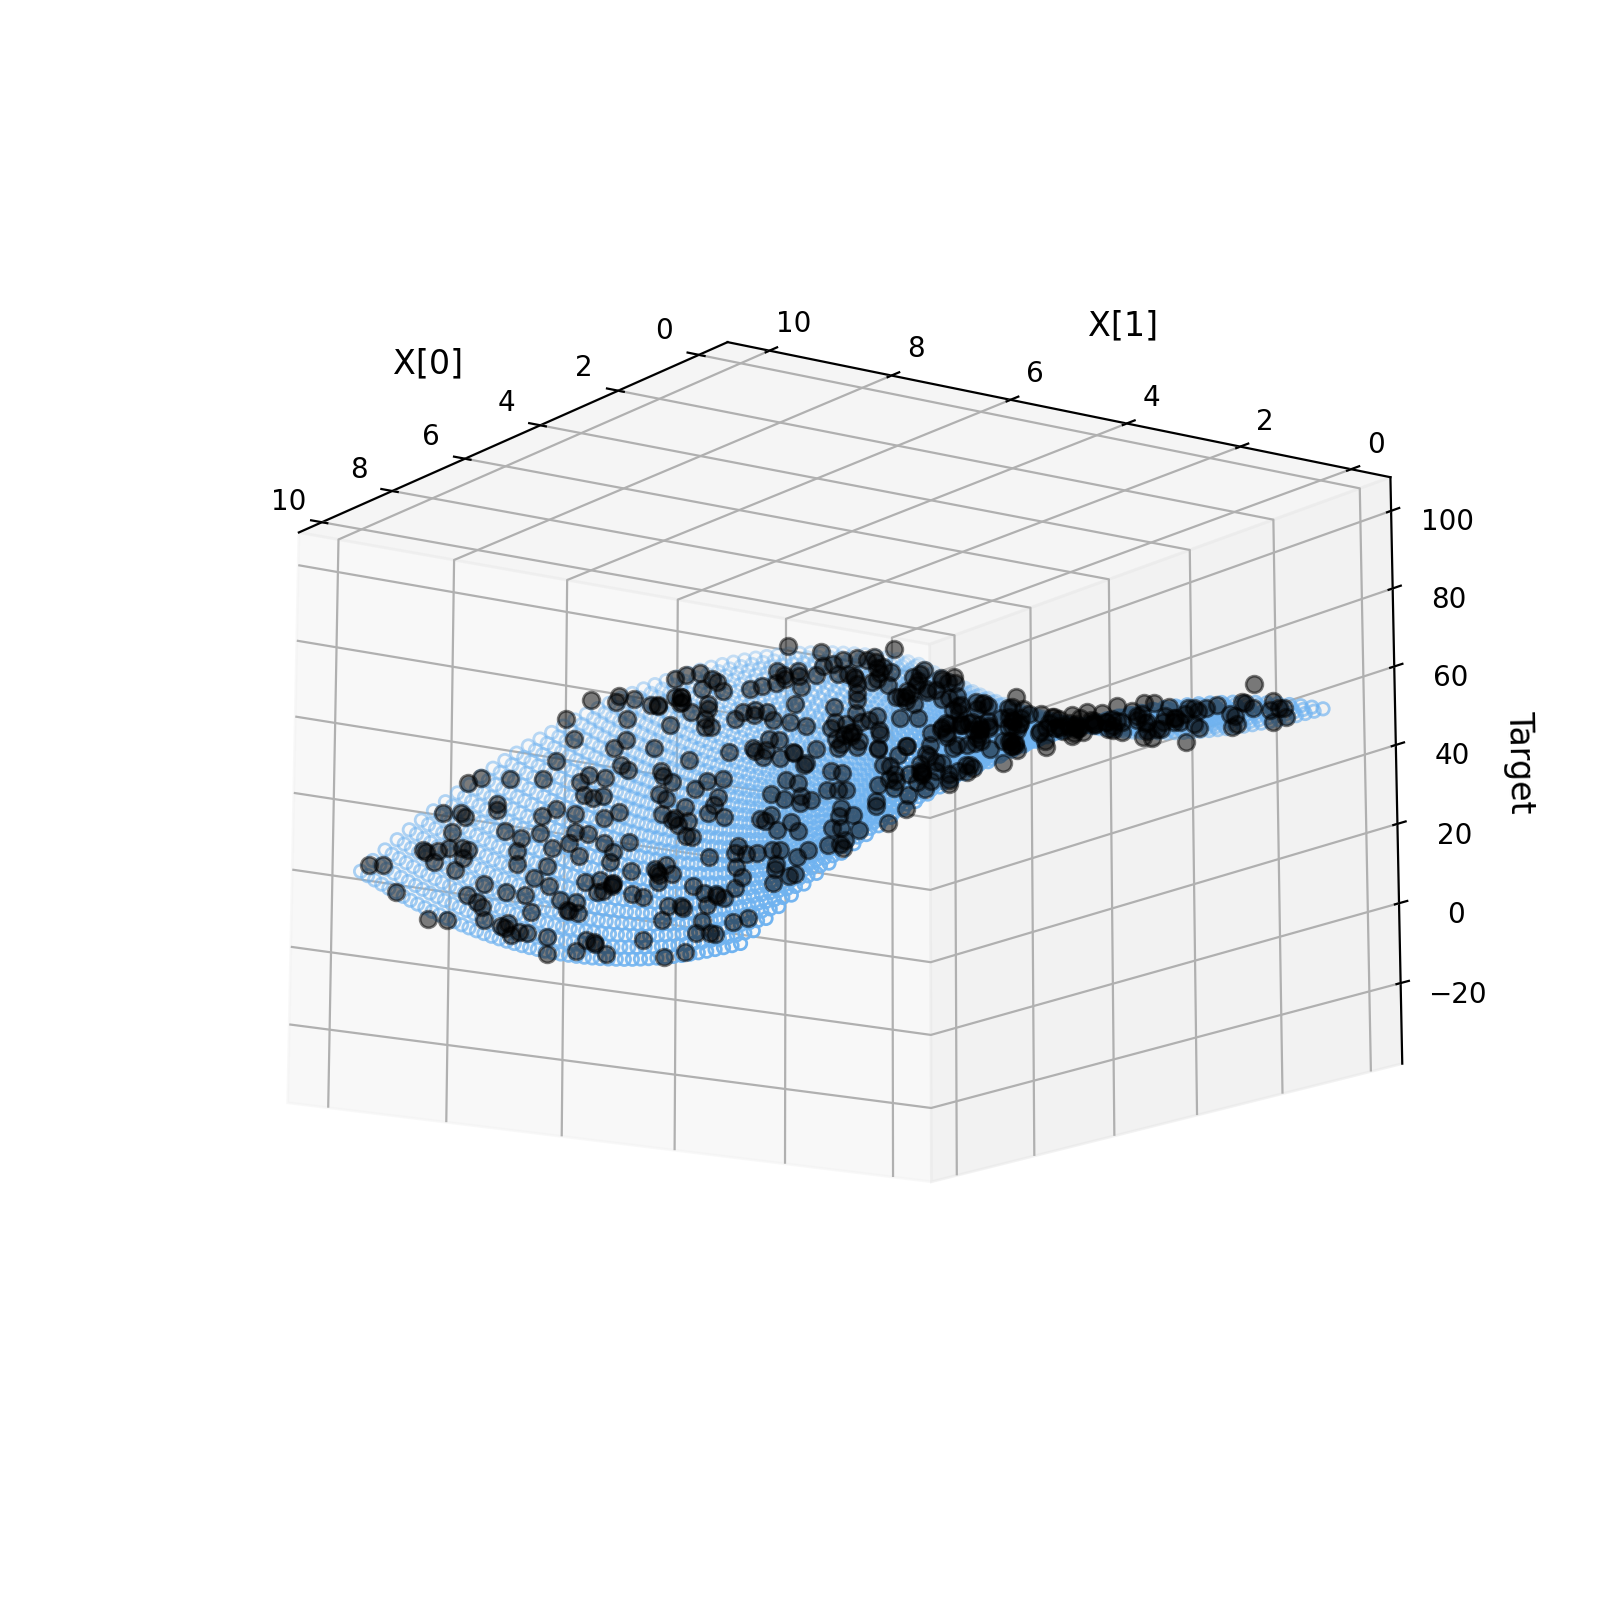

In [198]:
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0], Xgrid[:,1], poly_y_pred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [199]:
# To turn off interactive plotting
%matplotlib inline

### (8)

8. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation.

Using sklearn.model_selection.train_test_split, first do a train-test split with a test_size of  20% . Then split out a  20%  cross-validation set from the training set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out yerr as well by just providing this as another array to train_test_split.

Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from  1  to  10  inclusive. Plot the rms errors and BIC values as a function of the polynomial degree.

Choose the optimal polynomial degree, and train on all training data from the first train_test_split operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

In [206]:
from sklearn.model_selection import train_test_split

# 
Xtrain, Xtest, ytrain, ytest, yerr_train, yerr_test = train_test_split(X, y, yerr,test_size=20/100)

#
Xtrain, X_cv, ytrain, y_cv, yerr_train, yerr_cv = train_test_split(Xtrain, ytrain, yerr_train, test_size=20/100)

deg = np.arange(0, 10)
training_err = np.zeros(deg.shape)
crossval_err = np.zeros(deg.shape)

for i in range(len(deg)):
    p = PolynomialRegression(deg[i])
    p.fit(Xtrain,ytrain,yerr_train)
    training_err[i] = np.sqrt(np.sum((np.polyval(p, x) - y) ** 2)
                              / len(y))
    crossval_err[i] = np.sqrt(np.sum((np.polyval(p, X_cv) - y_cv) ** 2)
                              / len(y_cv))
    
# BIC_train = np.sqrt(len(y)) * training_err / dy + d * np.log(len(y))
# BIC_crossval = np.sqrt(len(y)) * crossval_err / dy + d * np.log(len(y))

ValueError: could not broadcast input array from shape (320,2) into shape (320,0)

In [ ]:
# np.sqrt(np.sum((p.predict(train_X2)- train_y2) ** 2/ train_yerr2**2)) + degrees[i]*np.log(len(train_X2))